## Úloha 2 - chytrý instagramový filtr

Naším úkolem je naprogramovat chytrý instagramový filtr, který umístí nad obličeje korunku, například takto:

![Actress Filter](./data/actress_result.png)

Filtr pro nás bude representován funkcí, jejíž vstupem bude originální barevný obrázek (levo) a výstupem bude stejně velký barevný obrázek, kde bude posazena nad každým obličejem korunka.

## Rozdělení na podúlohy

Pokud pracujeme na komplexní úloze, hodí se vždy ji rozdělit do několika jednodušších kroků, případně nejdřív vytvořit jednoduší verzi řešení a postupně složitost zvyšovat. My budeme postupovat tak, že vyřešíme nejdříve následující podúlohy:

1. nahrajeme obrázek obličeje do proměnné, vykreslíme ho a převedeme z barevného do stupní šedi,
1. použijeme předpřipravený klasifikátor na černobílý obrázek a nalezneme souřadnice tváří v obrázku
1. na základě souřadnic:
    1. zakreslíme do kopie původního obrázku obdelník kolem obličeje
    1. vymažeme z kopie původního obrázku obličej
1. nahrajeme obrázek korunky (pozor na transparentní pozadí) a velikost korunky přizpůsobíme velikosti obličeje
1. upravenou korunku umístíme do kopie původního obrázku nad obličej
1. implementujeme funkci, která provede všechny kroky a vrátí výsledný obrázek

## Import knihoven

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

## Nahrání obrázku, převod do stupňů šedi a zobrazení

In [ ]:
# VÁŠ KÓD ZDE
img_gray = None # nahrajte do této proměnné obrázek

(2560, 1440, 3)


## Načtení a použití klasifikátoru

In [22]:
# cesta k našemu klasifikátoru (upravte podle toho, jak )
face_classifier_path = os.path.join("classifiers", "haarcascade_frontalface_default.xml")
# vytvoření objektu, který použijeme k hledání obličejů
face_classifier = cv2.CascadeClassifier(face_classifier_path)
faces = face_classifier.detectMultiScale(img_gray)
print(f"Počet obličejů v obrázku: {len(faces)}")
print(f"Jejich souřadnice: \n{faces}")
# VÁŠ KÓD ZDE 

Počet obličejů v obrázku: 2
Jejich souřadnice: 
[[ 361  498  730  730]
 [ 373 2241   54   54]]


## Obdelník kolem obličeje

Obdelník, souřadnice: [361,498], velikost: 730 x 730 pixelů.
Obdelník, souřadnice: [373,2241], velikost: 54 x 54 pixelů.


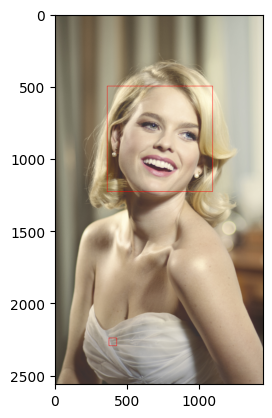

In [23]:
# použijte funkci cv2.rectangle(...)


# Udělám si kopii originálního obrázku, protože do něho budu kreslit
image_boxes = img_gray.copy()
# pro každý nalezený obličej nakreslím jeden obdelník
# v našem případě je tam pouze jeden obličej
for face in faces:
    # rozbalím si hodnoty z proměnné 'face'
    x, y, width, height = face
    # jakou barvu bude mít rámeček
    border_color = (0,0,255) # barvy jsou v pořadí B-G-R
    print(f"Obdelník, souřadnice: [{x},{y}], velikost: {width} x {height} pixelů.")
    # vykreslíme obdelník
    cv2.rectangle(image_boxes, (x,y), (x+width,y+height), border_color, thickness=2)

# převedu si obrázek (BGR-->RGB) a  vykreslím ho
image_boxes_rgb = cv2.cvtColor(image_boxes, cv2.COLOR_BGR2RGB)
plt.imshow(image_boxes_rgb)

## Vymazání obličeje

## Nahrání a upravení velikosti korunky

## Přidání korunky do obrázku

## Implementace funkce